<a href="https://colab.research.google.com/github/regain001/Machine-Learning/blob/master/Paper%20Review%20Analysis/Paper-Review-Analysis_(5-point-scale-Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-point scale Classification (label : Orientation) 

### **`Applied Hyper parameter tuning with k-Fold Cross-Validation in 4 different types of classifier algorithms`**
*SVM, Random Forest, Multinomial Naive Bayes, Logistic Regression*

*Using Count Vectorizer Technic*


**`Label : Orientation`**

**`Classification : 5-point scale`**


#### **Data Preprocessing**

In [0]:
import json

!wget --no-check-certificate \
    https://archive.ics.uci.edu/ml/machine-learning-databases/00410/reviews.json \
      -O /tmp/reviews.json

dataStore = []
with open("/tmp/reviews.json", 'r') as f:
    dataStore = json.load(f)


382


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f113bb38e80>]],
      dtype=object)

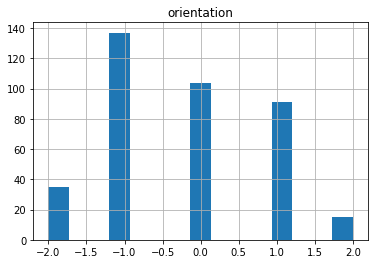

In [0]:
data=[]
for item in dataStore['paper']:

  primary_decision = item['preliminary_decision']
  item_reviews = item['review']

  for item in item_reviews:
    ls = []
    # orientation = item['orientation']
    evaluation = item['evaluation']
    confidence = item['confidence']
    remarks = item['remarks']
    text = item['text']

    label = item['orientation']

    # if(label == '1' or label == '2') : label = 2
    # elif( label == '0'): label = 1
    # else : label = 0

    if(item['text']!="" and item['lan']!="en"):
      ls.append(int(label))
      ls.append(int(evaluation))
      ls.append(int(confidence or 0))
      # ls.append(primary_decision)
      ls.append(text)

    # if(text!=""):ls.append("text")
    # else: ls.append("no text")

    # if(remarks!=""):ls.append("remarks")
    # else: ls.append("no remarks")

      data.append(ls)

print(len(data))

import pandas as pd
data = pd.DataFrame(data, columns=['orientation', 'evaluation', 'confidence', 'texts'])
# data.hist(figsize=(10,10), bins = 15)
# data.hist(column='orientation', bins = 15)
# print(len(labels))
# dt =  pd.DataFrame(labels, columns=['Ternary Classification : Orientation'])
# dt.hist()
data[5:8]
data.hist(column='orientation', bins = 15)

In [0]:
target = data.orientation
inputs = data
# data.head()
# inputs.head()

In [0]:
# One hot encoding
# dummies = pd.get_dummies(inputs.decision)
# dummies.head(2)

In [0]:
# inputs = pd.concat([inputs,dummies],axis='columns')
# inputs.head(3)

In [0]:
# inputs.columns[inputs.isna().any()]
data.groupby('orientation').describe()

evaluation                                ... confidence                    
                 count      mean       std  min  25%  ...        min  25%  50%  75%  max
orientation                                           ...                               
-2                35.0 -1.800000  0.531369 -2.0 -2.0  ...        1.0  3.5  4.0  4.0  5.0
-1               137.0 -0.890511  1.089244 -2.0 -2.0  ...        0.0  3.0  4.0  4.0  5.0
 0               104.0  0.615385  1.117449 -2.0  0.0  ...        1.0  3.0  4.0  4.0  5.0
 1                91.0  1.571429  0.598941  0.0  1.0  ...        1.0  3.0  3.0  4.0  5.0
 2                15.0  1.933333  0.258199  1.0  2.0  ...        2.0  4.0  4.0  4.5  5.0

[5 rows x 16 columns]

#### **Applying different Classifier Algorithms**

In [0]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    }

    # 'naive_bayes_gaussian': {
    #     'model': GaussianNB(),
    #     'params': {}
    # },
    # 'decision_tree': {
    #     'model': DecisionTreeClassifier(),
    #     'params': {
    #         'criterion': ['gini','entropy'],
    #     }
    # }  
}

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, f1_score, auc
from sklearn.model_selection import GridSearchCV, train_test_split

scores = []
X_train, X_test, y_train, y_test = train_test_split(inputs.texts,target, test_size = .20)

v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test.values)
X_test_count = v.transform(X_test)


for model_name, mp in model_params.items():
    
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_count, y_train)
    clf.score(X_test_count, y_test)

    y_predicted = clf.predict(X_test_count)
    conf_matx = confusion_matrix(y_test, y_predicted)

    # define pos label in order to calculate precision, recall, F1-Score, ROC 
    # for a ##specific Class
    positive_lbl = 0
    fpr, tpr, _ = roc_curve(y_test, y_predicted, pos_label = positive_lbl)
    roc_auc = auc(fpr, tpr)

    precision = precision_score(y_true=y_test, y_pred=y_predicted, average='macro', pos_label = positive_lbl)
    recall = recall_score(y_true=y_test, y_pred=y_predicted, average='macro', pos_label = positive_lbl)
    f1_scor = f1_score(y_true=y_test, y_pred=y_predicted, average='macro', pos_label = positive_lbl)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'c_matrix': conf_matx ,
        'roc_auc' : roc_auc,
        'precision' : precision,
        'recall' : recall,
        'f1_score' : f1_scor,
        'tpr' : tpr,
        'fpr' : fpr
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params', 'c_matrix', 'roc_auc', 
                                  'precision', 'recall', 'f1_score', 'tpr', 'fpr'])
df[['model','best_score','best_params', 'f1_score']]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when 

,model,best_score,best_params,f1_score
0,svm,0.422951,"{'C': 20, 'kernel': 'rbf'}",0.222178
1,random_forest,0.350820,{'n_estimators': 10},0.351498
2,logistic_regression,0.432787,{'C': 5},0.319270
3,naive_bayes_multinomial,0.357377,{},0.188971


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

c_matx = df['c_matrix']
roc_auc = df['roc_auc']
tpr =  df['tpr']
fpr = df['fpr']

def plot_roc(roc_index, title):
  plt.figure()
  lw = 2
  plt.plot(fpr[roc_index], tpr[roc_index], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[roc_index])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC : '+title)
  plt.legend(loc="lower right")
  plt.show()


def plot_cmatricx(c_matx_index, title):
  plt.figure(figsize = (5,4))
  sn.heatmap(c_matx[c_matx_index], annot=True)
  plt.title('Confusion Matricx : '+ title)
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

def otherValues(index):
  print('Accuracy :', df['best_score'][index])
  print('Precision :', df['precision'][index])
  print('Recall :', df['recall'][index])
  print('F1-Score :', df['f1_score'][index])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


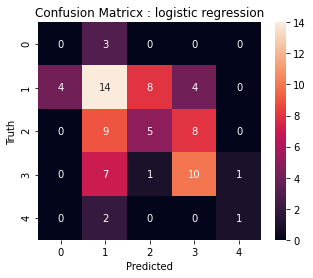

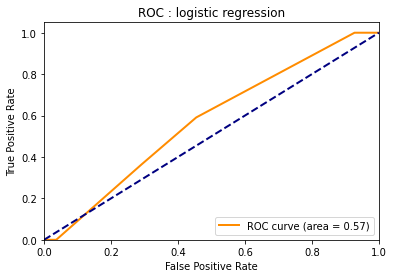

Accuracy : 0.4327868852459016
Precision : 0.34233766233766233
Recall : 0.3107177033492823
F1-Score : 0.3192703773191578


In [0]:
title = 'logistic regression'
index = 2
plot_cmatricx(index, title)
plot_roc(index, title)
otherValues(index)

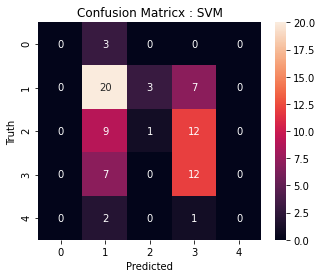

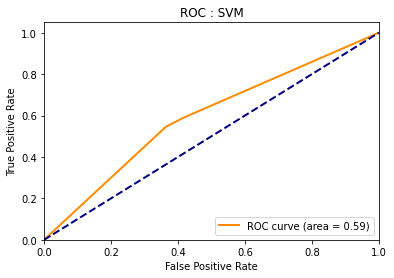

Accuracy : 0.4229508196721311
Precision : 0.2225609756097561
Recall : 0.2687400318979266
F1-Score : 0.22217831878146707


In [0]:
title = 'SVM'
index = 0
plot_cmatricx(index, title)
plot_roc(index, title)
otherValues(index)

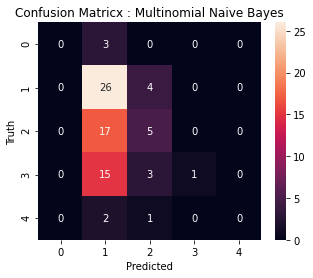

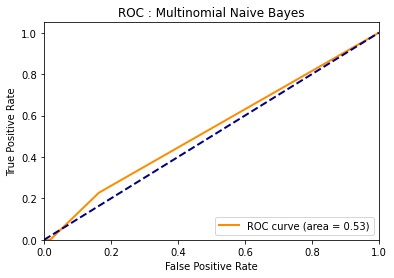

Accuracy : 0.35737704918032787
Precision : 0.35946275946275946
Recall : 0.22931419457735247
F1-Score : 0.18897081413210443


In [0]:
title = 'Multinomial Naive Bayes'
index = 3
plot_cmatricx(index, title)
plot_roc(index, title)
otherValues(index)

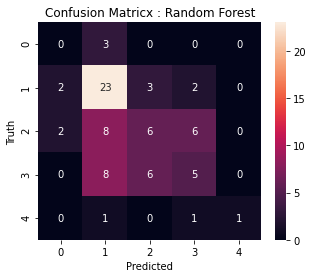

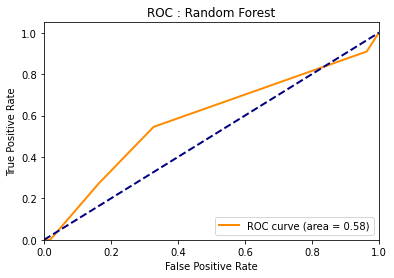

Accuracy : 0.3508196721311475
Precision : 0.45840531561461795
Recall : 0.32717703349282296
F1-Score : 0.3514983227311994


In [0]:
title = 'Random Forest'
index = 1
plot_cmatricx(index, title)
plot_roc(index, title)
otherValues(index)

In [0]:
dir(clf)

# 5-point scale Classification (label : Evaluation) 

### **`Applied Hyper parameter tuning with k-Fold Cross-Validation in 4 different types of classifier algorithms`**
*SVM, Random Forest, Multinomial Naive Bayes, Logistic Regression*

*Using Count Vectorizer Technic*

**`Label : Evaluation`**

**`Classification : 5-point scale`**


#### **Data Preprocessing**

In [0]:
import json

!wget --no-check-certificate \
    https://archive.ics.uci.edu/ml/machine-learning-databases/00410/reviews.json \
      -O /tmp/reviews.json

dataStore = []
with open("/tmp/reviews.json", 'r') as f:
    dataStore = json.load(f)


382


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1127f44e48>]],
      dtype=object)

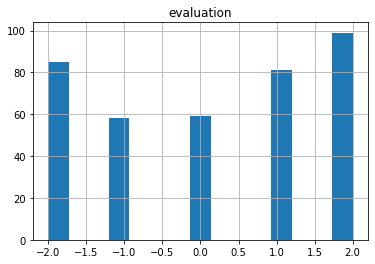

In [0]:
data=[]
for item in dataStore['paper']:

  primary_decision = item['preliminary_decision']
  item_reviews = item['review']

  for item in item_reviews:
    ls = []
    orientation = item['orientation']
    # evaluation = item['evaluation']
    confidence = item['confidence']
    remarks = item['remarks']
    text = item['text']

    label = item['evaluation']

    # if(label == '1' or label == '2') : label = 2
    # elif( label == '0'): label = 1
    # else : label = 0

    if(item['text']!="" and item['lan']!="en"):
      ls.append(int(label))
      ls.append(int(orientation))
      ls.append(int(confidence or 0))
      # ls.append(primary_decision)
      ls.append(text)

    # if(text!=""):ls.append("text")
    # else: ls.append("no text")

    # if(remarks!=""):ls.append("remarks")
    # else: ls.append("no remarks")

      data.append(ls)

print(len(data))

import pandas as pd
data = pd.DataFrame(data, columns=['evaluation', 'orientation', 'confidence', 'texts'])
# data.hist(figsize=(10,10), bins = 15)
# data.hist(column='orientation', bins = 15)
# print(len(labels))
# dt =  pd.DataFrame(labels, columns=['Ternary Classification : Orientation'])
# dt.hist()
data[5:8]
data.hist(column='evaluation', bins = 15)

In [0]:
target = data.evaluation
inputs = data
# inputs = data.drop(['confidence'], axis = 'columns')
# data.head()
# inputs.head()

In [0]:
# One hot encoding
# dummies = pd.get_dummies(inputs.decision)
# dummies.head(2)

In [0]:
# inputs = pd.concat([inputs,dummies],axis='columns')
# inputs.head(3)

In [0]:
inputs.columns[inputs.isna().any()]
data.groupby('evaluation').describe()

orientation                                ... confidence                    
                 count      mean       std  min  25%  ...        min  25%  50%  75%  max
evaluation                                            ...                               
-2                85.0 -1.282353  0.589830 -2.0 -2.0  ...        1.0  3.0  4.0  4.0  5.0
-1                58.0 -0.862069  0.475663 -2.0 -1.0  ...        0.0  3.0  4.0  4.0  5.0
 0                59.0 -0.474576  0.703585 -2.0 -1.0  ...        1.0  3.0  4.0  4.0  5.0
 1                81.0  0.259259  0.685160 -1.0  0.0  ...        1.0  3.0  3.0  4.0  5.0
 2                99.0  0.808081  0.737851 -1.0  0.0  ...        1.0  3.0  4.0  4.0  5.0

[5 rows x 16 columns]

#### **Applying different Classifier Algorithms**

In [0]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    }

    # 'naive_bayes_gaussian': {
    #     'model': GaussianNB(),
    #     'params': {}
    # },
    # 'decision_tree': {
    #     'model': DecisionTreeClassifier(),
    #     'params': {
    #         'criterion': ['gini','entropy'],
    #     }
    # }  
}

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, f1_score, auc
from sklearn.model_selection import GridSearchCV

scores = []
X_train, X_test, y_train, y_test = train_test_split(inputs.texts,target, test_size = .20)

v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test.values)
X_test_count = v.transform(X_test)


for model_name, mp in model_params.items():
    
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_count, y_train)
    clf.score(X_test_count, y_test)

    y_predicted = clf.predict(X_test_count)
    conf_matx = confusion_matrix(y_test, y_predicted)

    # define pos label in order to calculate precision, recall, F1-Score, ROC 
    # for a ##specific Class
    positive_lbl = 2
    fpr, tpr, _ = roc_curve(y_test, y_predicted, pos_label = positive_lbl)
    roc_auc = auc(fpr, tpr)

    precision = precision_score(y_true=y_test, y_pred=y_predicted, average='macro', pos_label = positive_lbl)
    recall = recall_score(y_true=y_test, y_pred=y_predicted, average='macro', pos_label = positive_lbl)
    f1_scor = f1_score(y_true=y_test, y_pred=y_predicted, average='macro', pos_label = positive_lbl)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'c_matrix': conf_matx ,
        'roc_auc' : roc_auc,
        'precision' : precision,
        'recall' : recall,
        'f1_score' : f1_scor,
        'tpr' : tpr,
        'fpr' : fpr
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params', 'c_matrix', 'roc_auc', 
                                  'precision', 'recall', 'f1_score', 'tpr', 'fpr'])
df[['model','best_score','best_params', 'f1_score']]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binar

,model,best_score,best_params,f1_score
0,svm,0.344262,"{'C': 10, 'kernel': 'rbf'}",0.216801
1,random_forest,0.327869,{'n_estimators': 10},0.217353
2,logistic_regression,0.360656,{'C': 10},0.381737
3,naive_bayes_multinomial,0.281967,{},0.269402


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

c_matx = df['c_matrix']
roc_auc = df['roc_auc']
tpr =  df['tpr']
fpr = df['fpr']

def plot_roc(roc_index, title):
  plt.figure()
  lw = 2
  plt.plot(fpr[roc_index], tpr[roc_index], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[roc_index])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC : '+title)
  plt.legend(loc="lower right")
  plt.show()


def plot_cmatricx(c_matx_index, title):
  plt.figure(figsize = (5,4))
  sn.heatmap(c_matx[c_matx_index], annot=True)
  plt.title('Confusion Matricx : '+ title)
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

def otherValues(index):
  print('Accuracy :', df['best_score'][index])
  print('Precision :', df['precision'][index])
  print('Recall :', df['recall'][index])
  print('F1-Score :', df['f1_score'][index])


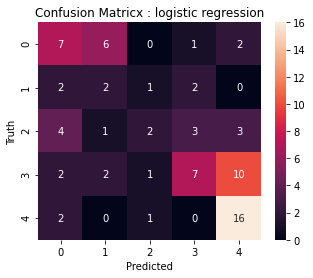

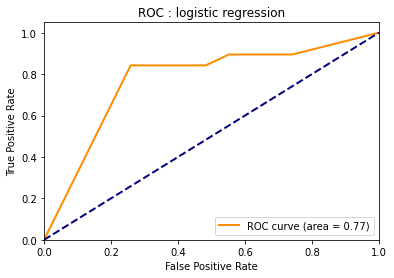

Accuracy : 0.36065573770491804
Precision : 0.40963469168402755
Recall : 0.4074695041800305
F1-Score : 0.3817373737373737


In [0]:
title = 'logistic regression'
index = 2
plot_cmatricx(index, title)
plot_roc(index, title)
otherValues(index)

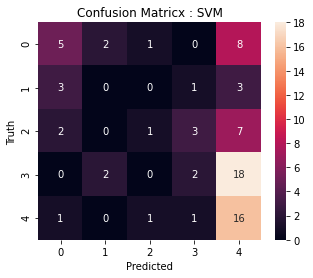

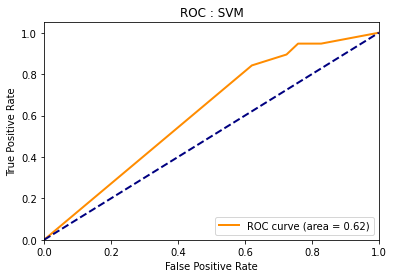

Accuracy : 0.3442622950819672
Precision : 0.2762570762570763
Recall : 0.26448748619801254
F1-Score : 0.21680112604104834


In [0]:
title = 'SVM'
index = 0
plot_cmatricx(index, title)
plot_roc(index, title)
otherValues(index)

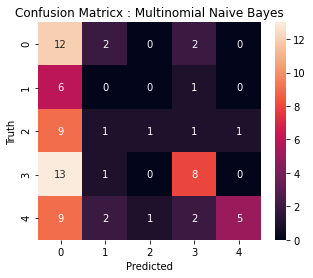

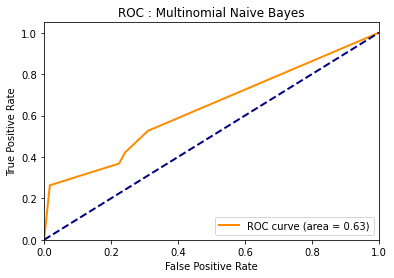

Accuracy : 0.2819672131147541
Precision : 0.42993197278911566
Recall : 0.29074346705925647
F1-Score : 0.2694017094017094


In [0]:
title = 'Multinomial Naive Bayes'
index = 3
plot_cmatricx(index, title)
plot_roc(index, title)
otherValues(index)

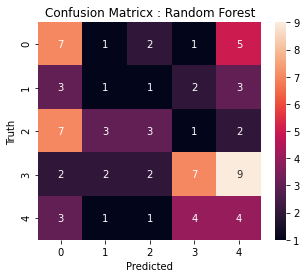

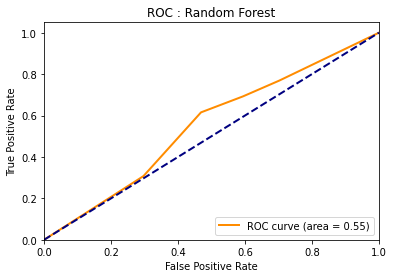

Accuracy : 0.3344262295081967
Precision : 0.2834189723320158
Recall : 0.27017482517482516
F1-Score : 0.26402655286865817


In [0]:
title = 'Random Forest'
index = 1
plot_cmatricx(index, title)
plot_roc(index, title)
otherValues(index)

In [0]:
dir(clf)